In [0]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip # Download dataset for Google Colab
!unzip /content/kagglecatsanddogs_3367a.zip
print("Download Complete")

Download Complete


In [0]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = True

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:',self.catcount)
        print('Dogs:',self.dogcount)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

  0%|          | 46/12501 [00:00<00:27, 457.69it/s]

PetImages/Cat


  1%|          | 76/12501 [00:00<00:16, 756.79it/s]

PetImages/Dog


100%|██████████| 12501/12501 [00:15<00:00, 785.95it/s]


Cats: 12476
Dogs: 12470


In [0]:
np.eye(10)[2] #Good method for creating Hot encoding values.

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [0]:
training_data = np.load("training_data.npy", allow_pickle = True)

In [0]:
len(training_data)

24946

In [0]:
training_data[0]

array([array([[112, 107, 112, ...,  82,  82,  82],
       [113, 114, 112, ...,  86,  84,  82],
       [111, 112, 112, ...,  86,  89,  88],
       ...,
       [189, 193, 192, ..., 173, 167, 171],
       [196, 190, 193, ..., 175, 164, 163],
       [193, 195, 201, ..., 179, 175, 171]], dtype=uint8),
       array([0., 1.])], dtype=object)

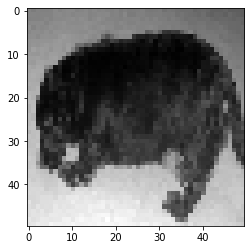

In [0]:
import matplotlib.pyplot as plt

plt.imshow(training_data[0][0], cmap="gray") # Get img section of array. training_data = [img, dtype=uint8]
plt.show()